# Data Viz Jam Sessions (04/06/19)

#### This is a data visualization practice for the Data Viz Jam Sessions event on May 4th 2019
##### Data is available at https://data.world/makeovermonday/2019w16 (week 16 / year 2019 of the makeovermonday series). It includes word frequencies for the book 'Info We Trust'.
##### For info on Data Viz Jam Sessions in Montréal: 
https://www.meetup.com/it-IT/Data-Viz-Jam-Sessions-MTL/?_af_cid=Data-Viz-Jam-Sessions-MTL&_xtd=gatlbWFpbF9jbGlja9oAJDRmYTI0MTk5LWUzOGItNDFkNi05YzU1LWQwMjE4NjFmMWFlMg&_af=chapter

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.plotly as py
import plotly.graph_objs as go

In [5]:
content = pd.read_csv('C:/Users/gurkaali/Documents/Info/Ben/Data-Challenges/DataViz/Contents.csv')
data = pd.read_csv('C:/Users/gurkaali/Documents/Info/Ben/Data-Challenges/DataViz/Data.csv')


In [6]:
data2 = data[['wordForm','page','totalCount']].groupby(['wordForm','page','totalCount']).size()

In [7]:
data2 = data2.reset_index()
#data2.set_index(['wordForm', 'page'], inplace = True)
data2.rename(columns={0: 'page_word_count'}, inplace=True)

In [8]:
df = pd.merge(data2, content, 
    left_on=['page'],
    right_on=['page'],
    how='left')

In [9]:
df.set_index(['wordForm', 'page'], inplace = True)

In [10]:
df.head()

totalCount  page_word_count section  chapter  \
wordForm page                                                 
ability  4             37                1  ORIGIN        0   
         5             37                1  ORIGIN        0   
         6             37                1  ORIGIN        0   
         10            37                1  ORIGIN        0   
         24            37                1  ORIGIN        2   

                               title  
wordForm page                         
ability  4     THE GOAL OF OUR CRAFT  
         5     THE GOAL OF OUR CRAFT  
         6     THE GOAL OF OUR CRAFT  
         10    THE GOAL OF OUR CRAFT  
         24      INFORMATION MURMURS

## How About a Word Cloud ?

In [11]:
comment_words = ''
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
    
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

In [12]:
comment_words

'the goal of our craft the goal of our craft the goal of our craft the goal of our craft information murmurs information murmurs information murmurs information murmurs information murmurs embodied encoding embodied encoding counting time counting time world building world building world building infuse meaning infuse meaning true colors true colors explore to create explore to create explore to create create to explore create to explore uncertain honesty uncertain honesty uncertain honesty make make inspire trust focus attention focus attention data shadows information murmurs information murmurs counting time counting time counting time world building infuse meaning infuse meaning true colors true colors explore to create create to explore uncertain honesty uncertain honesty uncertain honesty uncertain honesty encounter encounter inspire trust focus attention focus attention focus attention creative routines data shadows data shadows data shadows data shadows embodied encoding embodi

In [13]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words)

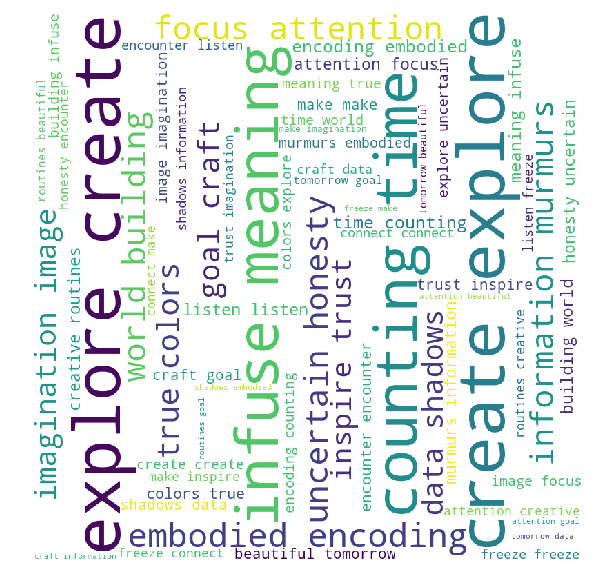

In [14]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

* The wordcloud above shows repetitive words. This is because the same words exists both as a single word andpart of a multiple word phrases. 
* As section names are titles made up of multiple words rather than single words, using word frequencies makes more sense.
* Use the generate_from_frequencies method

Let's see the most common titles:

In [15]:
df.groupby('title').size()

title
BEAUTIFUL TOMORROW       169
CONNECT                  259
COUNTING TIME            494
CREATE TO EXPLORE        436
CREATIVE ROUTINES        230
DATA SHADOWS             344
EMBODIED ENCODING        485
ENCOUNTER                337
EXPLORE TO CREATE        385
FOCUS ATTENTION          447
FREEZE                   287
IMAGINATION TO IMAGE     345
INFORMATION MURMURS      417
INFUSE MEANING           495
INSPIRE TRUST            320
LISTEN                   458
MAKE                     349
THE GOAL OF OUR CRAFT    354
TRUE COLORS              378
UNCERTAIN HONESTY        439
WORLD BUILDING           440
[transition]              32
dtype: int64

In [16]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='skyblue', 
                min_font_size = 10,
                max_font_size=60,
                colormap="Blues").generate_from_frequencies(df.groupby('title').size())

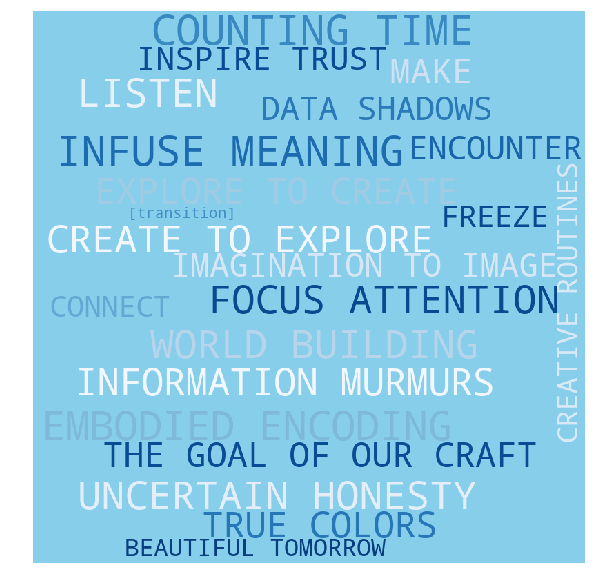

In [17]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

* Titles alone do not give much insight, maybe the word count by section is a better idea. Filtering for the most useful words is also more meaningful (there are no stopwords to delete). For this purpose 
    * Make a interactive chart that lets the user go through different sections: the user can see how the common words change.
    * Create the wordy function to make wordcloud creation practical for every section and to feed the interactive chart

## Pareto

In [18]:
def my_pareto(d):
    #Exclude any negative payments that can make the cumulative percentage go > 100% before we get to them
    df=pd.DataFrame( d[d>0].sort_values(ascending=False) )
    df['pc']= 100*d/d.sum()
    df['cum_pc']=df['pc'].cumsum()
    return df[ (df['cum_pc'] <= 80)  ]

##### Prepare data sets for each section. Remove the additional columns created by the Pareto function and rename the count columns

In [19]:
df_ORIGIN = df[df['section'] == 'ORIGIN']
df_ORIGIN = df_ORIGIN.groupby('wordForm').size().sort_values(ascending = False)
df_ORIGIN = my_pareto(df_ORIGIN).drop(columns=['pc','cum_pc']).rename(columns={0:'count'})

df_METAPHORICAL = df[df['section'] == 'METAPHORICAL']
df_METAPHORICAL = df_METAPHORICAL.groupby('wordForm').size().sort_values(ascending = False)
df_METAPHORICAL = my_pareto(df_METAPHORICAL).drop(columns=['pc','cum_pc']).rename(columns={0:'count'})

df_MATHEMAGICAL = df[df['section'] == 'MATHEMAGICAL']
df_MATHEMAGICAL = df_MATHEMAGICAL.groupby('wordForm').size().sort_values(ascending = False)
df_MATHEMAGICAL = my_pareto(df_MATHEMAGICAL).drop(columns=['pc','cum_pc']).rename(columns={0:'count'})

df_SENSATIONAL = df[df['section'] == 'SENSATIONAL']
df_SENSATIONAL = df_SENSATIONAL.groupby('wordForm').size().sort_values(ascending = False)
df_SENSATIONAL = my_pareto(df_SENSATIONAL).drop(columns=['pc','cum_pc']).rename(columns={0:'count'})

df_INFORMATIONAL = df[df['section'] == 'INFORMATIONAL']
df_INFORMATIONAL = df_INFORMATIONAL.groupby('wordForm').size().sort_values(ascending = False)
df_INFORMATIONAL = my_pareto(df_INFORMATIONAL).drop(columns=['pc','cum_pc']).rename(columns={0:'count'})

df_ONWARD = df[df['section'] == 'ONWARD']
df_ONWARD = df_ONWARD.groupby('wordForm').size().sort_values(ascending = False)
df_ONWARD = my_pareto(df_ONWARD).drop(columns=['pc','cum_pc']).rename(columns={0:'count'})

Create a function to make the wordcloud more flexible. Use the chapter as input:

In [20]:
def wordy(x):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='skyblue', 
                min_font_size = 10,
                max_font_size=60,
                colormap="viridis").generate_from_frequencies(x)
    return wordcloud

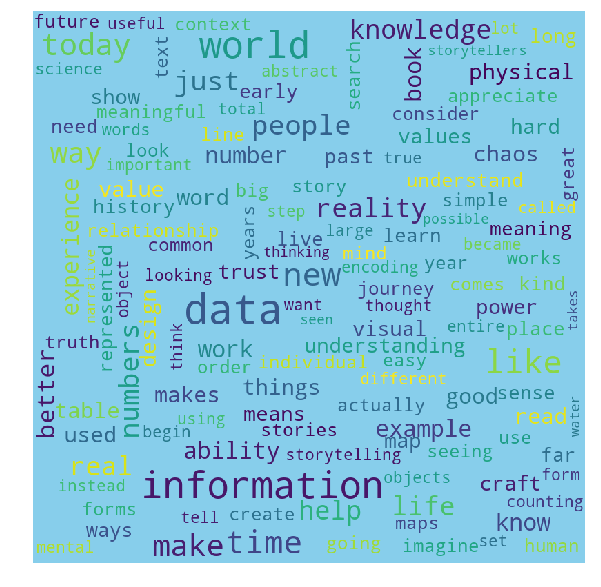

In [21]:
wordcloud = wordy(df_ORIGIN['count'])
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

###### Going through different wordclouds via a dropdown would be cool but...

###### Wordcloud is not accepted as data:
Valid items for 'data' at path ['data'] under parents ['figure']:
    ['Area', 'Bar', 'Box', 'Candlestick', 'Carpet', 'Choropleth',
    'Contour', 'Contourcarpet', 'Heatmap', 'Heatmapgl', 'Histogram',
    'Histogram2d', 'Histogram2dcontour', 'Mesh3d', 'Ohlc', 'Parcoords',
    'Pie', 'Pointcloud', 'Sankey', 'Scatter', 'Scatter3d', 'Scattercarpet',
    'Scattergeo', 'Scattergl', 'Scattermapbox', 'Scatterternary',
    'Surface', 'Table']

## Word Clouds by Section

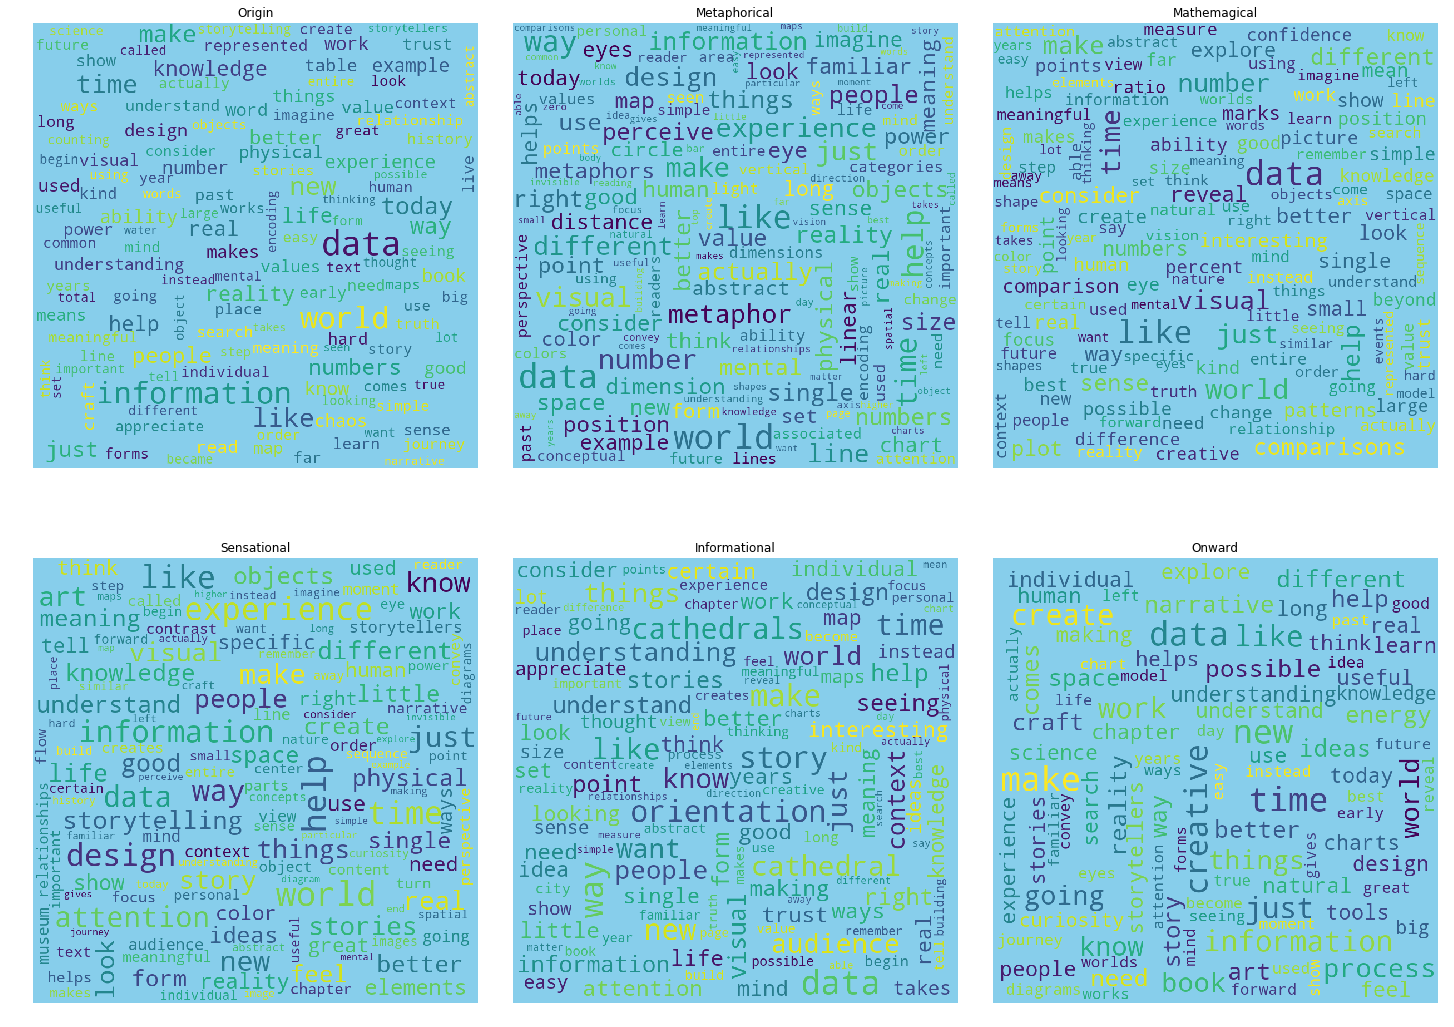

In [22]:
#from plotly import tools
plt.figure(1, figsize = (20, 15)) 

plt.subplot(231)
plt.axis("off") 
plt.title('Origin')
plt.imshow(wordy(df_ORIGIN['count']))

#plt.figure(1) 
plt.subplot(232)
plt.axis("off") 
plt.title('Metaphorical')
plt.imshow(wordy(df_METAPHORICAL['count']))

#plt.figure(1) 
plt.subplot(233)
plt.axis("off") 
plt.title('Mathemagical')
plt.imshow(wordy(df_MATHEMAGICAL['count']))

#plt.figure(1) 
plt.subplot(234)
plt.axis("off")  
plt.title('Sensational')
plt.imshow(wordy(df_SENSATIONAL['count']))

#plt.figure(1) 
plt.subplot(235)
plt.axis("off") 
plt.title('Informational')
plt.imshow(wordy(df_INFORMATIONAL['count']))

#plt.figure(1) 
plt.subplot(236)
plt.axis("off") 
plt.title('Onward')
plt.imshow(wordy(df_ONWARD['count']))

plt.tight_layout(pad = 0) 
plt.show()


## Bar Chart with Section Selection via Menu

In [23]:
def wordbar(x):
    mybar = go.Bar(x=list(x.index),
        y=list(x),
        text=x.index,
        marker={'color': list(x), 'colorscale': 'Viridis'},
        name='Word Count')
    return mybar

In [24]:
data = [wordbar(df_ORIGIN['count']), 
        wordbar(df_METAPHORICAL['count']), 
        wordbar(df_MATHEMAGICAL['count']), 
        wordbar(df_SENSATIONAL['count']), 
        wordbar(df_INFORMATIONAL['count']), 
        wordbar(df_ONWARD['count'])]

In [31]:
type(df_ORIGIN['count'])

pandas.core.series.Series

In [59]:
# Create your drop downs for the map
updatemenus = list([
    # drop-down 1: map styles menu
    # buttons containes as many dictionaries as many alternative map styles I want to offer
    dict(#type = "buttons",
        active=-1,
        buttons=list([
            dict(
                args=[{'visible': [True, False, False, False, False, False]}],
                label='Origin',
                method='update'
            ),
            dict(
                args=[{'visible': [False, True, False, False, False, False]}],
                label='Metaphorical',
                method='update'
            ),
            dict(
                args=[{'visible': [False, False, True, False, False, False]}],
                label='Mathemagical',
                method='update'
            ),
            dict(
                args=[{'visible': [False, False, False, True, False, False]}],
                label='Sensational',
                method='update'
            ),
            dict(
                args=[{'visible': [False, False, False, False, True, False]}],
                label='Informational',
                method='update'
            ),
            dict(
                args=[{'visible': [False, False, False, False, False, True]}],
                label='Onward',
                method='update'
            )
        ]),
        # direction where I want the menu to expand when I click on it
        direction='down',
        # here I specify where I want to place this drop-down on the map
        x=1.0,
        xanchor='right',
        y=1.2,
        yanchor='top',
        #  specify font size and colors
        bgcolor='#2bc4ba',
        bordercolor='#FFFFFF',
        font=dict(size=11)
    )
])
layout = dict(title='Number of Words by Section', 
              showlegend=False,
              #plot_bgcolor = 'F1FFD6', better without background color
              updatemenus=updatemenus)
figure = dict(data=data, layout=layout)
py.iplot(figure, filename='DataViz Exercise (4.May.19)')

Follow the link for the plotly chart, use the drop down menu for different views:
https://plot.ly/~nediyonbe/10/number-of-words-by-section/